# Analyzing Gun Deaths in the U.S. 

In [1]:
import csv
f = open("guns.csv", "r")
csvreader = csv.reader(f)
guns_data = list(csvreader)
print(guns_data[0:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]


### Remove the header row data:

In [3]:
header = guns_data[:1]
data = guns_data[1:]

In [4]:
print(header)

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']]


In [5]:
print(data[0:5])

[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


### Calculating how many gun deaths occur each year:

In [6]:
years = [row[1] for row in data] # Set the year data at index 1 to years list
year_counts = {}

for year in years:
    if year in year_counts:
        year_counts[year] += 1
    else:
        year_counts[year] = 1
year_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

### Calculating gun deaths by month and year:

In [7]:
import datetime
dates = [datetime.datetime(year = int(row[1]), month = int(row[2]), day=1) for row in data]
dates[:5]

[datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0)]

In [8]:
date_counts = {}

for date in dates:
    if date in date_counts:
        date_counts[date] += 1
    else: 
        date_counts[date] = 1
date_counts

{datetime.datetime(2012, 1, 1, 0, 0): 2758,
 datetime.datetime(2012, 2, 1, 0, 0): 2357,
 datetime.datetime(2012, 3, 1, 0, 0): 2743,
 datetime.datetime(2012, 4, 1, 0, 0): 2795,
 datetime.datetime(2012, 5, 1, 0, 0): 2999,
 datetime.datetime(2012, 6, 1, 0, 0): 2826,
 datetime.datetime(2012, 7, 1, 0, 0): 3026,
 datetime.datetime(2012, 8, 1, 0, 0): 2954,
 datetime.datetime(2012, 9, 1, 0, 0): 2852,
 datetime.datetime(2012, 10, 1, 0, 0): 2733,
 datetime.datetime(2012, 11, 1, 0, 0): 2729,
 datetime.datetime(2012, 12, 1, 0, 0): 2791,
 datetime.datetime(2013, 1, 1, 0, 0): 2864,
 datetime.datetime(2013, 2, 1, 0, 0): 2375,
 datetime.datetime(2013, 3, 1, 0, 0): 2862,
 datetime.datetime(2013, 4, 1, 0, 0): 2798,
 datetime.datetime(2013, 5, 1, 0, 0): 2806,
 datetime.datetime(2013, 6, 1, 0, 0): 2920,
 datetime.datetime(2013, 7, 1, 0, 0): 3079,
 datetime.datetime(2013, 8, 1, 0, 0): 2859,
 datetime.datetime(2013, 9, 1, 0, 0): 2742,
 datetime.datetime(2013, 10, 1, 0, 0): 2808,
 datetime.datetime(2013, 11,

### Exploring Sex and Race columns:

In [9]:
sexes = [row[5] for row in data] # Set the sex data at index 5 to sexes list
sex_counts = {}

for sex in sexes: 
    if sex in sex_counts:
        sex_counts[sex] += 1
    else:
        sex_counts[sex] = 1
sex_counts

{'M': 86349, 'F': 14449}

In [10]:
races = [row[7] for row in data] # Set the race data at index 7 to races list
race_counts = {}

for race in races:
    if race in race_counts:
        race_counts[race] += 1
    else:
        race_counts[race] = 1
race_counts

{'Asian/Pacific Islander': 1326,
 'White': 66237,
 'Native American/Native Alaskan': 917,
 'Black': 23296,
 'Hispanic': 9022}

### Importing a second dataset to explore the findings above in context with the general population:

In [11]:
import csv
f = open("census.csv", "r")
csvreader = csv.reader(f)
census = list(csvreader)
census

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

In [12]:
# Creating a dictionary with the data from above
mapping = {
    "Asian/Pacific Islander": 15159516 + 674625,
    "Native American/Native Alaskan": 3739506,
    "Black": 40250635,
    "Hispanic": 44618105,
    "White": 197318956
}

### Computing the gun death rates per race:

In [13]:
race_per_hundredk = {}

for key, value in race_counts.items():
    race_per_hundredk[key] = (value / mapping[key]) * 100000
race_per_hundredk

{'Asian/Pacific Islander': 8.374309664161762,
 'White': 33.56849303419181,
 'Native American/Native Alaskan': 24.521955573811088,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907}

### Now, we can filter based on intent.

### Homicide:

In [14]:
intents = [row[3] for row in data]
races = [row[7] for row in data]

homicide_race_counts = {}

for i,race in enumerate(races):
    if race not in homicide_race_counts:
        homicide_race_counts[race] = 0
    if intents[i] == "Homicide":
        homicide_race_counts[race] += 1

race_per_hundredk = {}
for key,value in homicide_race_counts.items():
    race_per_hundredk[key] = (value / mapping[key]) * 100000

In [15]:
homicide_race_counts

{'Asian/Pacific Islander': 559,
 'White': 9147,
 'Native American/Native Alaskan': 326,
 'Black': 19510,
 'Hispanic': 5634}

In [16]:
race_per_hundredk

{'Asian/Pacific Islander': 3.530346230970155,
 'White': 4.6356417981453335,
 'Native American/Native Alaskan': 8.717729026240365,
 'Black': 48.471284987180944,
 'Hispanic': 12.627161104219914}

### Suicide:

In [17]:
suicide_race_counts = {}

for i,race in enumerate(races):
    if race not in suicide_race_counts:
        suicide_race_counts[race] = 0
    if intents[i] == "Suicide":
        suicide_race_counts[race] += 1

race_per_hundredk = {}

for key,value in suicide_race_counts.items():
    race_per_hundredk[key] = (value / mapping[key]) * 100000

In [18]:
suicide_race_counts

{'Asian/Pacific Islander': 745,
 'White': 55372,
 'Native American/Native Alaskan': 555,
 'Black': 3332,
 'Hispanic': 3171}

In [19]:
race_per_hundredk

{'Asian/Pacific Islander': 4.705023152187416,
 'White': 28.06217969245692,
 'Native American/Native Alaskan': 14.841532544673013,
 'Black': 8.278130270491385,
 'Hispanic': 7.106980451097149}

### Looking at the relation between month and homicide:

In [20]:
months = [row[2] for row in data] # Set the month data at index 2 to months list
month_counts = {}

for month in months: 
    if month in month_counts:
        month_counts[month] += 1
    else:
        month_counts[month] = 1
month_counts

{'01': 8273,
 '02': 7093,
 '03': 8289,
 '04': 8455,
 '05': 8669,
 '06': 8677,
 '07': 8989,
 '08': 8783,
 '09': 8508,
 '10': 8406,
 '11': 8243,
 '12': 8413}

### Filtering to homicide by months:

In [21]:
month_homicide_counts = {}

for i,month in enumerate(months):
    if month not in month_homicide_counts:
        month_homicide_counts[month] = 0
    if intents[i] == "Homicide":
        month_homicide_counts[month] += 1
month_homicide_counts

{'01': 2829,
 '02': 2178,
 '03': 2780,
 '04': 2845,
 '05': 2976,
 '06': 3130,
 '07': 3269,
 '08': 3125,
 '09': 2966,
 '10': 2968,
 '11': 2919,
 '12': 3191}

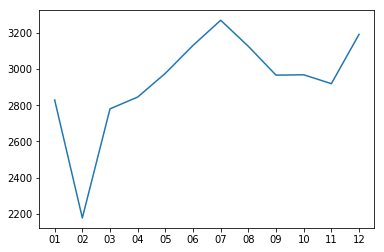

In [23]:
import matplotlib.pyplot as plt
lists = month_homicide_counts.items()
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

### We can see that homicides peak in July and are at the lowest point in February.

### Filtering to Suicides by month:

In [25]:
month_suicide_counts = {}

for i,month in enumerate(months):
    if month not in month_suicide_counts:
        month_suicide_counts[month] = 0
    if intents[i] == "Suicide":
        month_suicide_counts[month] += 1
month_suicide_counts

{'01': 5220,
 '02': 4732,
 '03': 5309,
 '04': 5438,
 '05': 5506,
 '06': 5367,
 '07': 5514,
 '08': 5421,
 '09': 5343,
 '10': 5256,
 '11': 5086,
 '12': 4983}

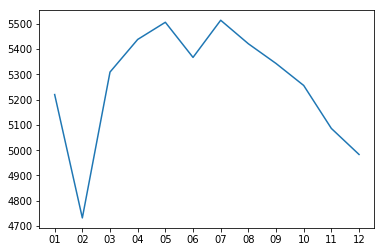

In [26]:
lists = month_suicide_counts.items()
x, y = zip(*lists)
plt.plot(x, y)
plt.show()